# Project - Final notebook


How to choose phone's brand according to Amazon ?

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import gzip
sns.set()
sns.axes_style("darkgrid")
sns.set_palette("Set2")

# Datasets we use

### http://jmcauley.ucsd.edu/data/amazon/
- Cell Phones and Accessories reviews : Amazon reviews for phones and accessories category
- Cell Phones and Accessories metadata : Metadata of products in phones and accessories category 

### https://www.kaggle.com/arwinneil/gsmarena-phone-dataset/
- GSMArena Phone Dataset : 8000+ phones specifications scraped from GSMArena Website

<a id='#read_the_data'></a>
# Read the data


We decided to save the different datasets to CSV files because of the efficency at the loading. We have another notebook that generates the files (in */scripts* path)


In [2]:
# read the data from previosly created csv files
reviews_df = pd.read_csv('./data/reviews_cellphones.csv')

In [3]:
metadata_df = pd.read_csv('./data/metadata_cellphones.csv')

In [4]:
ratings_cols = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
ratings_df = reviews_df[ratings_cols]

In [5]:
reviews_df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,A1EWN6KZ4HMLT7,011040047X,S. Prescott,"[2, 2]","The case pictured is a soft violet color, but ...",1.0,Wrong color,1344902400,"08 14, 2012"
1,1,A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5.0,Great product,1353542400,"11 22, 2012"
2,2,A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5.0,Perfect,1374105600,"07 18, 2013"
3,3,A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200,"01 13, 2013"
4,4,A292527VPX98P8,0110400550,Cebell,"[0, 1]",It may look cute. This case started off pretty...,1.0,Do NOT GET IT!!,1353888000,"11 26, 2012"


In [6]:
metadata_df.head()

,Unnamed: 0,asin,related,title,price,salesRank,imUrl,brand,categories,description
0,0,0110400550,"{'also_bought': ['B00C56IXFG', 'B008ZUQWOK', '...",Pink &amp; White 3d Melt Ice-cream Skin Hard C...,3.33,{'Cell Phones & Accessories': 83460},http://ecx.images-amazon.com/images/I/31zn6SOL...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Pink & White 3D Melt Ice-Cream Skin Hard Case ...
1,1,011040047X,"{'buy_after_viewing': ['B008RU7UL2', 'B00698LY...",Purple Hard Case Cover for Iphone 4 4s 4g with...,1.94,{'Cell Phones & Accessories': 495795},http://ecx.images-amazon.com/images/I/41WCZc2d...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Purple Hard Case Cover for iPhone 4 4S 4G With...
2,2,0195866479,"{'buy_after_viewing': ['B00530RXP2', 'B004SH9B...",Hello Kitty Light-weighted Chrome Case Black C...,2.94,{'Cell Phones & Accessories': 371302},http://ecx.images-amazon.com/images/I/41fy1%2B...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...","Thin and light weighted,\r\nCase's unique desi..."
3,3,0214514706,"{'buy_after_viewing': ['B0042FV2SI', 'B00869D2...",Cool Summer Breeze in the Ocean Beach Collecti...,0.94,{'Cell Phones & Accessories': 778100},http://ecx.images-amazon.com/images/I/415cmp6Q...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Product Name: Cool Summer Breeze In The Ocean...
4,4,0214714705,"{'buy_after_viewing': ['B008EU7HRM', 'B00869D2...",Cool Summer Breeze In The Ocean Beach Collecti...,5.79,{'Cell Phones & Accessories': 654894},http://ecx.images-amazon.com/images/I/41XDwPt2...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Product Name: Cool Summer Breeze In The Ocean...


In [7]:
ratings_df.head()

,reviewerID,asin,overall,unixReviewTime
0,A1EWN6KZ4HMLT7,011040047X,1.0,1344902400
1,A1YX2RBMS1L9L,0110400550,5.0,1353542400
2,A180NNPPKWCCU0,0110400550,5.0,1374105600
3,A3HVRXV0LVJN7,0110400550,5.0,1358035200
4,A292527VPX98P8,0110400550,1.0,1353888000



# Descriptive statistics
 

## Reviews analysis

First, we take a look at the entire reviews dataset for cellphones and accessories.

In [8]:
unique_reviewers = reviews_df['reviewerID'].unique()
unique_reviewers_percent = len(unique_reviewers) / reviews_df.shape[0] *100
unique_products = reviews_df['asin'].unique()
unique_products_percent = len(unique_products) / reviews_df.shape[0] *100
print ("Shape: ", reviews_df.shape)
print ("Ratings values: ", reviews_df.overall.unique())
print ("Min review unix time: ", reviews_df.unixReviewTime.min())
print ("Max review unix time: ", reviews_df.unixReviewTime.max())
print ("Percentage of unique reviewers: ", unique_reviewers_percent)
print ("Percentage of unique products: ", unique_products_percent)

Shape:  (3447249, 10)
Ratings values:  [ 1.  5.  2.  3.  4.]
Min review unix time:  942796800
Max review unix time:  1406073600
Percentage of unique reviewers:  65.5898369975595
Percentage of unique products:  9.273423532793831


### Overall ratings

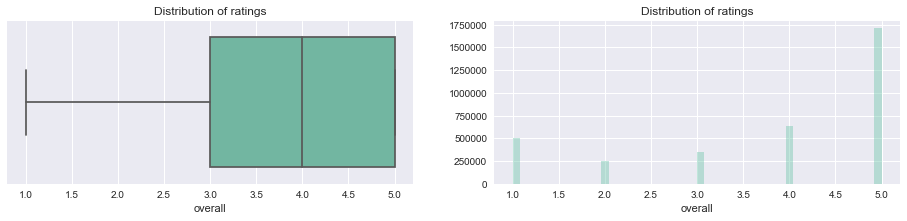

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax1 = sns.boxplot(reviews_df.overall, ax=ax[0])
ax2 = sns.distplot(reviews_df.overall, ax=ax[1], kde=False)
ax1.set_title('Distribution of ratings')
ax2.set_title('Distribution of ratings')
plt.show()

### Reviews through time
We plot the distribution of reviews through years, and for 2013.

In [10]:
#Re-compute datetime with unixReviewTime
reviews_df['datetime'] = pd.to_datetime(reviews_df.unixReviewTime, unit='s')

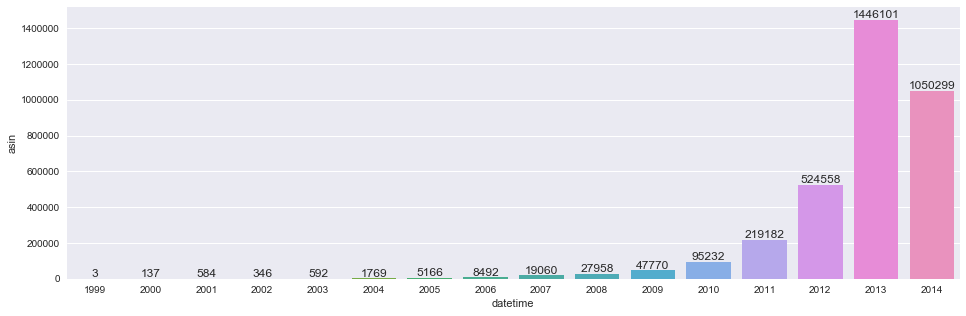

In [11]:
#By year in general
year = reviews_df.groupby([reviews_df.datetime.dt.year])['asin'].count()
fig, ax = plt.subplots(figsize=(16,5))
year_df = pd.DataFrame(year)
ax = sns.barplot(year_df.index, year_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10000,
            '{:1.0f}'.format(height),
            ha="center") 

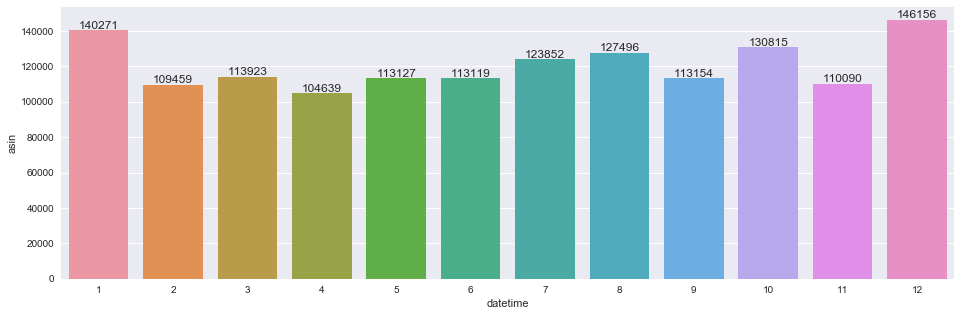

In [12]:
#In 2013 for example
year = reviews_df.groupby([reviews_df.datetime.dt.year, reviews_df.datetime.dt.month])['asin'].count()
year_2013 = year[(2013, )]
fig, ax = plt.subplots(figsize=(16,5))
year_2013_df = pd.DataFrame(year_2013)
ax = sns.barplot(year_2013_df.index, year_2013_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.0f}'.format(height),
            ha="center") 

## Metadata dataset

We also use the metadata dataset, to get more details on the products.

### Row data analysis
Here, we analyse the dataset that contains phones and accessories.

In [ ]:
null_price = metadata_df.price.isnull().sum()
null_price_percent = null_price / metadata_df.shape[0] *100
null_brand = metadata_df.brand.isnull().sum()
null_brand_percent = null_brand / metadata_df.shape[0] *100
print ("Number of products: ", metadata_df.shape[0])
print ("Percentage of null prices: ", null_price_percent)
print ("Percentage of null brands: ", null_brand_percent)

Number of products:  346793
Percentage of null prices:  18.4098294948
Percentage of null brands:  77.3873751777


In [ ]:
metadata_df.hist(column='price', bins=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4364416A0>]], dtype=object)

As we can see, we have missing values concerning the prices.

## Phones analysis

We decide to create a new meta dataframe that only contains information about phones.

In [ ]:
phones_df = metadata_df[metadata_df.categories.str.
            startswith("[['Cell Phones & Accessories', 'Cell Phones', 'Unlocked ")]
phones_df = phones_df[(pd.notnull(phones_df['brand'])) & (phones_df['brand'] != '')]
print("Phones count:", len(phones_df))
phones_df.head()

### Brand names

We decide to use a public dataset from GSMArena, which contains more than 8000 phones specifications scraped GSMArena Website.<br>
This dataset is available here: https://www.kaggle.com/arwinneil/gsmarena-phone-dataset/version/1 <br>
The last update is Jun 2017.

In [ ]:
gsmarena_df = pd.read_csv('./data/phone_dataset.csv', error_bad_lines=False)
gsmarena_df.head()

This dataset enables to filter the phones in our Amazon Phones dataframe using the phone brand.

In [ ]:
list_brands_accepted = gsmarena_df.brand.str.lower().unique()

In [ ]:
#Keep only phones contained in list of accepted brands
print(phones_df['brand'].str.lower().unique())
brands_number_before = len(phones_df['brand'].str.lower().unique())
phones_df_filtered = phones_df[phones_df['brand'].str.lower().isin(list_brands_accepted)]
brands_number_after = len(phones_df_filtered['brand'].str.lower().unique())
print('')
print('Before processing (# of brands, # of phones):', brands_number_before, len(phones_df))
print('After processing (# of brands, # of phones):', brands_number_after, len(phones_df_filtered))


### Phone prices

In [ ]:
print('Number of phones with NaN price:', phones_df_filtered.price.isnull().sum())

We can see that the prices for almost all phones are known, and most of them are in range 50-300 euros. 

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
avg_prices = phones_df_filtered.groupby('brand')['price'].mean().sort_values(ascending=False)
d = [i for i in range(0, len(avg_prices))]
ax = sns.stripplot(d, avg_prices,size=8, palette="Reds_r")
ax.set_xticklabels(avg_prices.index, rotation='vertical')
ax.set_title('Median prices of brands')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax1 = sns.boxplot(avg_prices, ax=ax[0])
ax2 = phones_df_filtered.hist(column='price', bins=70, ax=ax[1])
ax1.set_title('Distribution of median brand price')
ax1.set_title('Distribution of median brand price')
plt.show()

### Number of phones per brand

In [ ]:
phone_counts = phones_df_filtered.groupby('brand')['asin'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
d = [i for i in range(0, len(phone_counts))]
ax = sns.stripplot(d, phone_counts, size=8, palette="Reds_r")
ax.set_xticklabels(phone_counts.index, rotation='vertical')
ax.set_title('Phone counts per brand')
plt.show()

More than 200 phones are Samsung phones, Apple is the 5th.

## Merged dataframes for reviews and phones metadata


We will now merge these two dataframes and check statistics for new dataframe. 

In [ ]:
final_df = pd.merge(phones_df_filtered, reviews_df, on='asin', how='inner')
print('Number of reviews in total:', len(final_df))

In [ ]:
final_df.head()

In [ ]:
# Distribution of phone prices
final_df.hist(column='price', bins=70)

## Phone reviews through time

In [ ]:
#By year in general
year = final_df.groupby([final_df.datetime.dt.year])['asin'].count()
fig, ax = plt.subplots(figsize=(16,5))
year_df = pd.DataFrame(year)
ax = sns.barplot(year_df.index, year_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.0f}'.format(height),
            ha="center") 

We observe that the most important part of the reviews are from 2013-2014.

## Mean ratings of brands

In [ ]:
### Top10 prominent brands
brand_ratings = final_df.groupby('brand').agg({'overall':['mean','std']})

brand_ratings_df = pd.DataFrame(brand_ratings.overall)
brand_ratings_df.sort_values('mean', ascending=False)

In [ ]:
# TOP 10 Products by brands
brands = np.array(phone_counts.head(10).index)
brands

In [ ]:
top_products = final_df.groupby(['brand','title']).agg({'overall':['mean','std'], 'asin':'count'})
top_products.columns = top_products.columns.droplevel()
top_products_df = pd.DataFrame(top_products)

## TOP 10 reviewed phones by brand

In [ ]:
#TOP 10 reviewed phones
top_reviewed_brands_list = []
for brand in brands:
    top10_reviewed = top_products_df.iloc[top_products_df.index.get_level_values('brand') == brand]
    top_reviewed_brands_list.append(top10_reviewed.sort_values(['count'], ascending=False).head(10))
    
top_reviewed_brands = pd.concat(top_reviewed_brands_list)
top_reviewed_brands

## TOP 10 best rated phones by brand
Be careful, some phones are high-rated, but they have only one review.

In [ ]:
#TOP 10 best phones
top_best_brands_list = []
for brand in brands:
    top10_best = top_products_df.iloc[top_products_df.index.get_level_values('brand') == brand]
    top_best_brands_list.append(top10_best.sort_values(['mean'], ascending=False).head(10))
    
top_best_brands = pd.concat(top_best_brands_list)
top_best_brands

## Correlations
A high price does not mean necessarily a good grade.

In [ ]:
#Correlation between price and overall
final_df['price'].corr(final_df['overall'])

## Important words in general in reviews

Here, we want to show the feature importance of words, correlated with the total overall for each brands.<br>
We use CountVectorizer in order to convert the collection of reviews to a matrix of token counts.<br>
Then, this matrix containing all the features is pushed in SelectKBest() function which reduce the dimension (we choose 10) according to the k highest scores.<br>

Then, we plot the correlation between words. A high correlation means that the two words are highly correlated with the rate of the products (good or bad).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest

In [ ]:
for brand in brands:
    top10 = final_df[final_df.brand == brand]
    # Use CountVectorizer to get most important words in reviews for each brands
    vectorizer = CountVectorizer(max_features=25, stop_words='english')
    X = vectorizer.fit_transform(top10.reviewText.values.astype('U'))
    word_list = vectorizer.get_feature_names()
    
    model = SelectKBest(k=10).fit(X, top10.overall) # X:model and Y:score
    informative_words_index = model.get_support(indices=True)
    labels = [word_list[i] for i in informative_words_index]
    data = pd.DataFrame(X[:, informative_words_index].todense(), columns=labels)
    
    correlation_matrix = data.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    mask = np.zeros_like(correlation_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(correlation_matrix, mask=mask, cmap=sns.cubehelix_palette(8), ax=ax)
    ax.set_title(brand)
    fig.show()

# Additional analysis

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')

Here, we distinguish positive and negative reviews:
- if rate <= 2 : it is a negative review
- if rate == 3: it is a neutral review (not taken in account here)
- if rate >= 4 : it is a positive review

In [ ]:
print('Number of reviews:', final_df.reviewText.count())

review_number = final_df.groupby('brand')['reviewText'].count().sort_values(ascending=False)
negative_ratings = final_df.query('overall <= 2')
positive_ratings = final_df.query('overall >= 4')

negative = negative_ratings.groupby('brand')['reviewText'].count().sort_values(ascending=False)
positive = positive_ratings.groupby('brand')['reviewText'].count().sort_values(ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

d = [i for i in range(0, len(review_number))]
ax = sns.stripplot(d, review_number, size=8, palette="Reds_r")
ax = sns.stripplot(d, negative, size=8, palette="Greens_r")

ax.set_xticklabels(review_number.index, rotation='vertical')
ax.set_title('Number of reviews per brand')
plt.show()

We use the previous pipeline to get most important words in **negative** reviews for one example of phone (Samsung Galaxy S3 model)

In [ ]:
#print ("Brand: ", brand)
#top10 = positive_ratings[positive_ratings.brand == 'Samsung']
top10 = negative_ratings.query('title == \'Samsung Galaxy S3 GT-i8190 Mini Blue 8GB factory Unlocked 3G 900/1900/2100\'')
print ("size: ", top10.shape)
    
vectorizer = CountVectorizer(max_features=25, stop_words='english')
X = vectorizer.fit_transform(top10.reviewText.values.astype('U'))
word_list = vectorizer.get_feature_names()
model = SelectKBest(k=20).fit(X, top10.overall) # X:model and Y:score
informative_words_index = model.get_support(indices=True)
labels = [word_list[i] for i in informative_words_index]
data = pd.DataFrame(X[:, informative_words_index].todense(), columns=labels)
    
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(correlation_matrix, mask=mask,  ax=ax)
ax.set_title("Samsung Galaxy S3")
fig.show()

# First approach

For our first approach, we want to apply supervised learning in order to predict of some new reviews is positive or negative.

The plan is the following:
1. Tokenize reviews (stopwords are removed)
2. Lemmatization
3. Split reviews in two groups: training set (90% of data) and validation set (10% of data)
4. Train a Naive Bayes Classifier and compute the accuracy

In [ ]:
lemmatizer = WordNetLemmatizer()

def get_words(review):
    stop = stopwords.words('english') + list(string.punctuation) + ["..."] + ["'s"]
    tokens = nltk.tokenize.word_tokenize(str(review))
    tokens_filtered = [token.lower() for token in tokens]
    tokens_filtered = [token for token in tokens_filtered if token not in stop]
    tokens_filtered = [lemmatizer.lemmatize(token) for token in tokens_filtered]
    return tokens_filtered

def form_review(review):
    p = get_words(review)
    s = {word: True for word in get_words(review)}
    return s

positive_model_reviews = positive_ratings
negative_model_reviews  = negative_ratings

print (positive_model_reviews.shape)
print (negative_model_reviews.shape)

positive_reviews_list = list(positive_model_reviews.reviewText)
negative_reviews_list = list(negative_model_reviews.reviewText)

positive_data = []
negative_data = []


for review in positive_reviews_list[0:10000]:
    positive_data.append([form_review(review), 'pos'])
    
for review in negative_reviews_list[0:10000]:
    negative_data.append([form_review(review), 'neg'])

train_data = positive_data[0:9000] + negative_data[0:9000]
test_data = positive_data[9000:] + negative_data[9000:]

print('Size train data:', len(train_data))
print('Size test data:', len(test_data))

In [ ]:
from nltk import NaiveBayesClassifier

model = NaiveBayesClassifier.train(train_data)

In [ ]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(model, test_data))*100)

In [ ]:
model.show_most_informative_features(5)

### Sentiment analysis on all reviews

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Show the first 10 reviews
for sentence in positive_reviews_list[:10]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in ss:
        print(k," : ", ss[k])
    print()

# Second approach

On the second approch, we focus only on reviews according to a brand.
Here is the plan:
1. First, we split the reviews according to the grade (5 groups from 1 to 5).
2. **Topic modelling**: with words vectors and LDA (Latent Dirichlet Allocation) approach: reviews are seen as a bag of words, and topics as a distribution over a fixed vocabulary. Words are generated from document specific topic distributions. As the output of this step we have 10 topics with 10 most import words for each topic (for each brand).
3. **Tag a sentiment on topic words** : We use the previous Sentiment Analyzer to get a weighted sentiment for the topic.<BR>
We consider two kind of words:
    - Feature words (which is one phone feature like battery, price, etc.)
    - Non-feature words (all the others, including 'great', 'bad', 'awesome', 'problem', etc.)
All the non-feature words which are on the topic will be sentiment analyzed. 

4. The weighted scores of all the non-feature words will be given to all the feature words in the following topic. If a topic not contains feature words, we simply skip it.
5. At the end, we group the results to get an overview for all the reviews (all grades) : we count the density of appearence for each feature words in topics, and we also show the sum of polarity scores for each feautre word.

In [ ]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

ratings = np.unique(final_df['overall'])
stop_words = text.ENGLISH_STOP_WORDS.union(['phone', 'phones', 'iphone', 'apple', 'samsung', 'amazon']) # Common words

NUMBER_TOPICS = 10
MAX_ITER = 25
MAX_FEATURES = 250
TOP_WORDS = 10


df = pd.DataFrame()

for brand in brands:
    for rate in ratings:
        reviews = final_df.query('brand==@brand & overall==@rate')['reviewText'].dropna()
        tf_vectorizer = CountVectorizer(max_features=MAX_FEATURES, stop_words=stop_words)
        tf = tf_vectorizer.fit_transform(reviews)
        tf_feature_names = tf_vectorizer.get_feature_names()

        lda = LatentDirichletAllocation(n_components=NUMBER_TOPICS, max_iter=MAX_ITER, random_state=0, learning_method='batch').fit(tf)

        #Normalize
        lda.components_ /= lda.components_.sum(axis=1)[:, np.newaxis]

        for topic_idx, topic in enumerate(lda.components_):
            temp_df = pd.DataFrame()
            for i in topic.argsort()[:-TOP_WORDS - 1:-1]:
                df = df.append({'brand': brand, 'overall':rate, 'topic_id':topic_idx + 1, 'score': topic[i], 'word':tf_feature_names[i]}, ignore_index=True)


In [ ]:
# init sentiment 'analysis'
df["pos_score"] = 0.0
df["neg_score"] = 0.0
df["neu_score"] = 0.0
df["comp_score"] = 0.0

In [ ]:
df.head()

In [ ]:
feature_words = ["apps", "camera", "price", "battery", "charge", "sound", "memory", "screen", "speaker"]

In [ ]:
score = dict()
for row_num in range(0, len(df), 1):
    word = df['word'][row_num]
    
    # Give score only to non feature words
    if not word in feature_words:
        score = sid.polarity_scores(word)
        pos_score = score['pos'] * df['score'][row_num] * 100
        neg_score = score['neg'] * df['score'][row_num] * 100
        neu_score = score['neu'] * df['score'][row_num] * 100
        comp_score = score['compound'] * df['score'][row_num] * 100

        df.set_value(row_num, 'pos_score', pos_score)
        df.set_value(row_num, 'neg_score', neg_score)
        df.set_value(row_num, 'neu_score', neu_score)
        df.set_value(row_num, 'comp_score', comp_score)

In [ ]:
after_filtering = pd.DataFrame(data=df)

topics = np.unique(df['topic_id'])
overall = np.unique(df['overall'])

# SKIP ALL TOPICS THAT NOT HAVE FEATURE WORD
for brand in brands:
    for topic in topics:
        for rate in overall:
            temp_df = pd.DataFrame(df.query('brand == @brand & topic_id == @topic & overall == @rate')).reset_index(drop=True)

            in_feature_word = False
            for row_num in range(0, len(temp_df), 1):

                word = temp_df['word'][row_num]

                if word in feature_words:
                    in_feature_word = True
                    break
                else:
                    in_feature_word = False

            if not in_feature_word:
                useless_topics = df[
                    (df['topic_id'] == topic) & (df['brand'] == brand) & (df['overall'] == rate)].index.tolist()
                after_filtering = after_filtering.drop(useless_topics, axis=0)


In [ ]:
after_filtering.head()

In [ ]:
result = []

# FOR EACH FEATURE WORD WE SUM THE SCORE OF ALL THE WORDS IN THE TOPIC
for brand in brands:
    for topic in topics:
        for rate in overall:
            temp_df = pd.DataFrame(after_filtering.query('brand == @brand & topic_id == @topic & overall == @rate')).reset_index(drop=True)

            temp_df_wo_ftr = pd.DataFrame(temp_df[~temp_df['word'].isin(feature_words)]).reset_index(drop=True)
            temp_df_w_ftr = pd.DataFrame(temp_df[temp_df['word'].isin(feature_words)]).reset_index(drop=True)

            pos = temp_df_wo_ftr['pos_score'].sum()
            neg = temp_df_wo_ftr['neg_score'].sum()
            neu = temp_df_wo_ftr['neu_score'].sum()
            comp = temp_df_wo_ftr['comp_score'].sum()

            for row_num in range(0, len(temp_df_w_ftr), 1):

                word = temp_df_w_ftr['word'][row_num]
                append_list_pos = [brand, word, 1, "Positive", pos]
                append_list_neg = [brand, word, 1, "Negative", neg]
                append_list_neu = [brand, word, 1, "Neutral", neu]
                append_list_comp =[brand, word, 1, "Compound", comp]
                result.extend([append_list_pos, append_list_neg, append_list_neu, append_list_comp])

In [ ]:
result = pd.DataFrame(data=result,
                      columns=["Brand", "Feature", "Density", "Category", "Score"])
results_grouped = pd.DataFrame(data=result.groupby(["Brand", "Category", "Feature"]).sum())

In [ ]:
rg = results_grouped.reset_index()

# Kind of normalization to compare brands
rg['Score'] = rg['Score'] / rg['Density']

## Results - Conclusion

Now, we have all the sentiment analysis results according all the feature words.<br>
An interesting thing to do is to compare different brands. All generated plots for all brands are available in the folder "**results**".

We obtain two kind of plots:
1. Composition of positive/negative/neutral scores for each feature words
2. The average score for each feature words (Compound value of Vader sentiment analysis)

In [ ]:
# Positive rate, negative rate, and neutral rate
for brand in brands:
    result_brand = rg.query('Brand == @brand').sort_values(by="Density", ascending=False)
    fig, ax = plt.subplots(figsize=(16, 8))
    ax1 = sns.barplot(x="Feature", y="Score", hue="Category", data=result_brand, ci=None, palette=sns.color_palette("coolwarm", 3), hue_order=["Positive", "Neutral", "Negative"])
    ax1.set_title(brand)
    plt.savefig('./results/' + brand + '_composition.png', bbox_inches='tight', pad_inches=0)

In [ ]:
# Aggregated score (compound) provided by vader sentiment analysis
for brand in brands:
    result_brand = rg.query('Brand == @brand & Category == "Compound"').sort_values(by="Density", ascending=False)
    fig, ax = plt.subplots(figsize=(16, 8))
    ax1 = sns.barplot(data=result_brand, x="Feature", y="Score", palette=sns.color_palette("GnBu_d"))
    ax1.set_title(brand)
    plt.savefig('./results/' + brand + '_compound.png', bbox_inches='tight', pad_inches=0)